# Pryngles module: Science

In [1]:
from pryngles import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#@test:science
def test_coords(self):

    #Test axis
    axis=[
        [+1,+0,+0],[-1,+0,+0],
        [+0,+1,+0],[+0,-1,+0],
        [+0,+0,+1],[+0,+0,-1],
    ]
    for i,xyz in enumerate(axis):
        rqf=Science.spherical(xyz)
        cqsqsf=Science.cospherical(xyz)
        rhofct=Science.pcylindrical(xyz)
        print(f"Axis {i+1}:")
        print("\tSpherical:",rqf[0],rqf[1]*Consts.rad,rqf[2]*Consts.rad)
        print("\tCospherical:",cqsqsf)
        print("\tVerify:",mh.cos(rqf[1]),mh.sin(rqf[1]),mh.sin(rqf[2]))
        print("\tPseudo cilyndrical:",rhofct)
        print("\tVerify:",rqf[0]*np.cos(rqf[2]),rqf[1],mh.sin(rqf[2]))

    #Test spherical
    octants=[
        [+1,+1,+1],[-1,+1,+1],[-1,-1,+1],[+1,-1,+1],
        [+1,+1,-1],[-1,+1,-1],[-1,-1,-1],[+1,-1,-1]
    ]
    for i,xyz in enumerate(octants):
        rqf=Science.spherical(xyz)
        cqsqsf=Science.cospherical(xyz)
        rhofct=Science.pcylindrical(xyz)
        print(f"Octant {i+1}:")
        print("\tSpherical:",rqf[0],rqf[1]*Consts.rad,rqf[2]*Consts.rad)
        print("\tCospherical:",cqsqsf)
        print("\tVerify:",mh.cos(rqf[1]),mh.sin(rqf[1]),mh.sin(rqf[2]))
        print("\tPseudo cilyndrical:",rhofct)
        print("\tVerify:",rqf[0]*np.cos(rqf[2]),rqf[1],mh.sin(rqf[2]))

    #Test cartesian
    octants=[
        [1,45*Consts.deg,45*Consts.deg],[1,135*Consts.deg,45*Consts.deg],
        [1,225*Consts.deg,45*Consts.deg],[1,315*Consts.deg,45*Consts.deg],
        [1,45*Consts.deg,-45*Consts.deg],[1,135*Consts.deg,-45*Consts.deg],
        [1,225*Consts.deg,-45*Consts.deg],[1,315*Consts.deg,-45*Consts.deg]
    ]
    for i,rqf in enumerate(octants):
        xyz=Science.cartesian(rqf)
        print(f"Octant {i+1}:",xyz) 

    #Test direction
    nvec=Science.direction(120,45)
    print(nvec,Science.direction(*nvec))

class Test(unittest.TestCase):pass
Test.test_coords=test_coords
unittest.main(argv=['first-arg-is-ignored'],exit=False)
#@end:test

.

Axis 1:
	Spherical: 1.0 0.0 0.0
	Cospherical: [1. 0. 0.]
	Verify: 1.0 0.0 0.0
	Pseudo cilyndrical: [1.         6.28318531 0.        ]
	Verify: 1.0 0.0 0.0
Axis 2:
	Spherical: 1.0 180.0 0.0
	Cospherical: [-1.  0.  0.]
	Verify: -1.0 1.2246467991473532e-16 0.0
	Pseudo cilyndrical: [1.         3.14159265 0.        ]
	Verify: 1.0 3.141592653589793 0.0
Axis 3:
	Spherical: 1.0 90.0 0.0
	Cospherical: [0. 1. 0.]
	Verify: 6.123233995736766e-17 1.0 0.0
	Pseudo cilyndrical: [1.         1.57079633 0.        ]
	Verify: 1.0 1.5707963267948966 0.0
Axis 4:
	Spherical: 1.0 270.0 0.0
	Cospherical: [ 0. -1.  0.]
	Verify: -1.8369701987210297e-16 -1.0 0.0
	Pseudo cilyndrical: [1.         4.71238898 0.        ]
	Verify: 1.0 4.71238898038469 0.0
Axis 5:
	Spherical: 1.0 0.0 90.0
	Cospherical: [1. 0. 1.]
	Verify: 1.0 0.0 1.0
	Pseudo cilyndrical: [0.         6.28318531 1.        ]
	Verify: 6.123233995736766e-17 0.0 1.0
Axis 6:
	Spherical: 1.0 0.0 -90.0
	Cospherical: [ 1.  0. -1.]
	Verify: 1.0 0.0 -1.0
	Pseudo ci


----------------------------------------------------------------------
Ran 1 test in 0.010s

OK


In [3]:
#@test:science
def test_rot(self):

    Verbose.VERBOSITY=VERB_ALL

    #Test rotation
    Msys2uni,Muni2sys=Science.rotation_matrix([0,0,1],0)
    print(Msys2uni)

    Msys2uni,Muni2sys=Science.rotation_matrix([1,0,-1],0)
    print(Msys2uni)
    print(Muni2sys)

    Verbose.VERBOSITY=VERB_NONE

class Test(unittest.TestCase):pass
Test.test_rot=test_rot
unittest.main(argv=['first-arg-is-ignored'],exit=False)
#@end:test

.

      VERB3::rotation_matrix:: Rotation axis: [1 0 0] [0. 1. 0.] [0. 0. 1.]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
      VERB3::rotation_matrix:: Rotation axis: [-0.  1.  0.] [0.70710678 0.         0.70710678] [ 0.70710678  0.         -0.70710678]
[[-0.          0.70710678  0.70710678]
 [ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]]
[[-0.          1.          0.        ]
 [ 0.70710678  0.          0.70710678]
 [ 0.70710678  0.         -0.70710678]]



----------------------------------------------------------------------
Ran 1 test in 0.145s

OK


      VERB3::limb_darkening:: Normalization of limb darkening function for cs = [0.5356762614403678], N = 2.580633784375288
0.3044715217560634


<IPython.core.display.Javascript object>


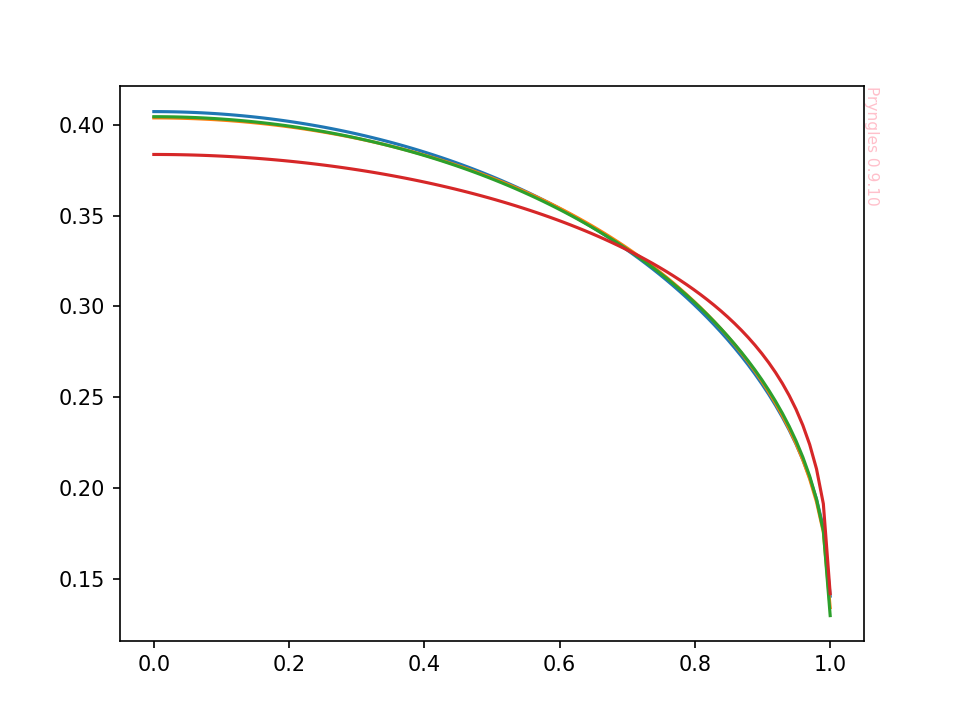

.

      VERB3::limb_darkening:: Normalization of limb darkening function for cs = [0.655], N = 2.45567825755602
      VERB3::limb_darkening:: Normalization of limb darkening function for cs = [0.6022, 0.0654], N = 2.4767269283350704
      VERB3::limb_darkening:: Normalization of limb darkening function for cs = [0.9724, -0.4962, 0.2029], N = 2.472665297844586
      VERB3::limb_darkening:: Normalization of limb darkening function for cs = [-0.2018, 2.1, -2.0247, 0.7567], N = 2.6067005991229735



----------------------------------------------------------------------
Ran 1 test in 0.063s

OK


In [4]:
#@test:science
def test_limb(self):

    Verbose.VERBOSITY=VERB_ALL

    cs=[np.random.rand()]
    I=Science.limb_darkening(0.8,cs)
    print(I)

    fig=plt.figure()
    ax=fig.gca()

    rhos=np.linspace(0,1,100)
    coefs=[0.6550]
    ax.plot(rhos,Science.limb_darkening(rhos,coefs))
    coefs=[0.6022,0.0654]
    ax.plot(rhos,Science.limb_darkening(rhos,coefs))
    coefs=[0.9724,-0.4962,0.2029]
    ax.plot(rhos,Science.limb_darkening(rhos,coefs))    
    coefs=[-0.2018,2.1000,-2.0247,0.7567]
    ax.plot(rhos,Science.limb_darkening(rhos,coefs))
    Plot.pryngles_mark(ax)

    Verbose.VERBOSITY=VERB_NONE

class Test(unittest.TestCase):pass
Test.test_limb=test_limb
unittest.main(argv=['first-arg-is-ignored'],exit=False)
#@end:test

30 30


<IPython.core.display.Javascript object>


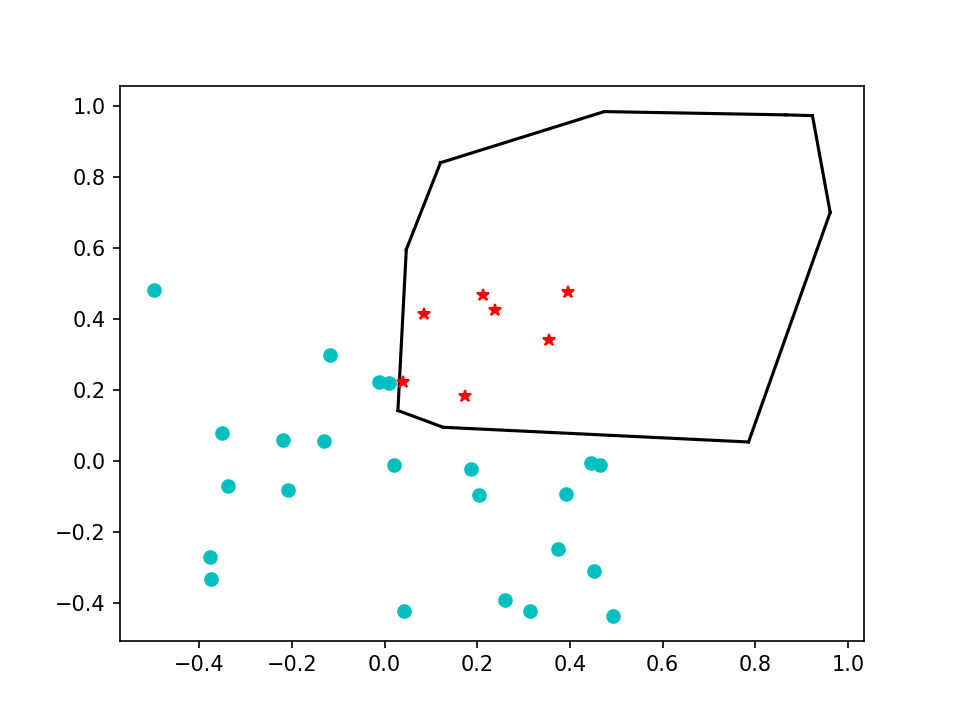

.
----------------------------------------------------------------------
Ran 1 test in 0.040s

OK


In [5]:
#@test:science
def test_hull(self):

    Verbose.VERBOSITY=VERB_ALL

    rng = np.random.default_rng()
    points = rng.random((30, 2))
    hull = Science.get_convexhull(points)

    ps = rng.random((30, 2))-0.5
    cond=Science.points_in_hull(ps,hull)
    print(len(cond),len(ps))

    import matplotlib.pyplot as plt
    plt.figure()
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

    for p in ps[cond]:
        plt.plot(p[0],p[1],'r*')

    for p in ps[~cond]:
        plt.plot(p[0],p[1],'co')

    Verbose.VERBOSITY=VERB_NONE

class Test(unittest.TestCase):pass
Test.test_hull=test_hull
unittest.main(argv=['first-arg-is-ignored'],exit=False)
#@end:test

{'a': 26, 'b': 7, 'c': 9, 'd': 3, 'p1x': -1, 'p1y': 2, 'p1z': 1, 'p2x': 0, 'p2y': -3, 'p2z': 2, 'p3x': 1, 'p3y': 1, 'p3z': -4, 'normal': 28.39013913315678, 'nx': 0.915810939779251, 'ny': 0.2465644837867214, 'nz': 0.3170114791543561}
Is above:  False
Projection:  ([-1.67741935483871, 1.0099255583126552, 3.727047146401985], 4.015478735955178)


<IPython.core.display.Javascript object>


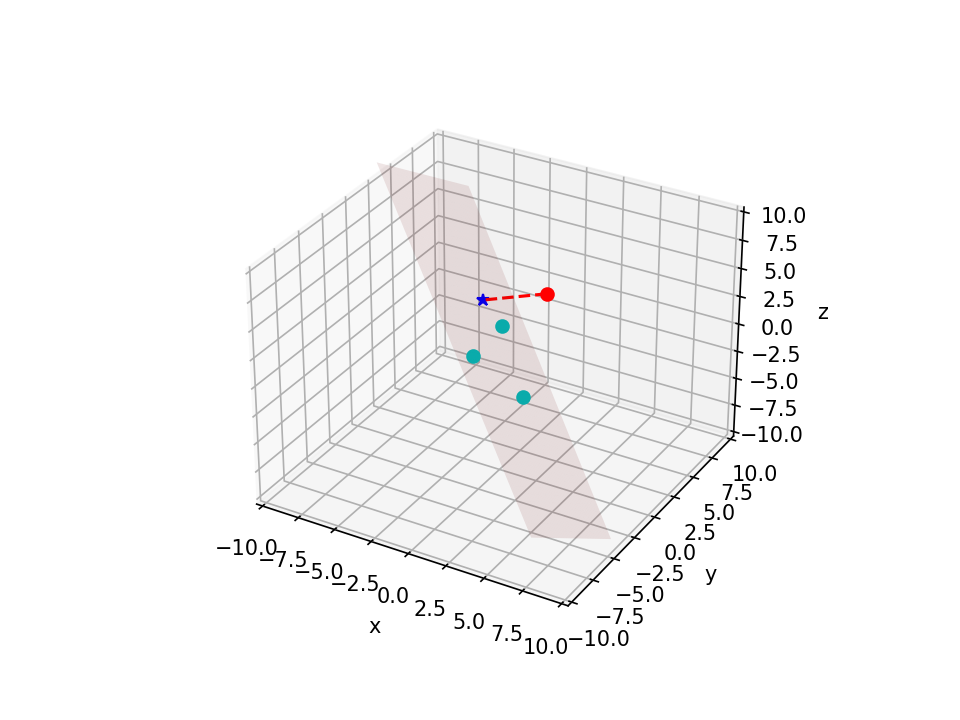

.
----------------------------------------------------------------------
Ran 1 test in 0.034s

OK


In [6]:
#@test:science
def test_plane(self):

    Verbose.VERBOSITY=VERB_SIMPLE

    plt.close("all")

    #Calculate plane

    #Test plane
    p1=[-1,2,1]
    p2=[0,-3,2]
    p3=[1,1,-4]
    plane=Plane(p1,p2,p3)
    print(plane)
    #Debe dar: {'a': 26, 'b': 7, 'c': 9, 'd': 3}

            #Check if point is above with respect to a direction
    p=[2,2,5]
    print("Is above: ",plane.is_above(p,[0,0,-1]))

    v=plane.get_projection(p)
    print("Projection: ",v)
    plane.plot_plane(p=p,alpha=0.1,color='r')

    Verbose.VERBOSITY=VERB_NONE

class Test(unittest.TestCase):pass
Test.test_plane=test_plane
unittest.main(argv=['first-arg-is-ignored'],exit=False)
#@end:test

In [ ]:
#@end:module

## Playing ground